In [1]:
from IPython.display import Image, display, HTML
from mira.modeling import Model
from mira.modeling.viz import GraphicalModel
from mira.metamodel import Concept
from pathlib import Path
import json
from pydantic.json import pydantic_encoder

desktop = Path.home().joinpath("Desktop")

def to_desktop(m, name):
    desktop.joinpath(name).write_text(m.json(indent=2))

This is the model given as a DOI at the top of Scenario 1


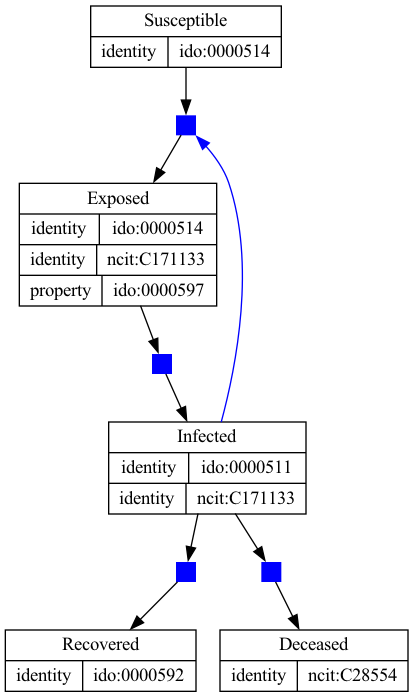

In [2]:
from mira.sources.biomodels import get_template_model

model_1 = get_template_model('BIOMD0000000974')

to_desktop(model_1, "BIOMD0000000974.mmt.json")

GraphicalModel.for_jupyter(model_1, width="30%")

The second model requested is the first one that's been stratified by vaccination status

In [3]:
dead = model_1.get_concepts_by_name("Deceased")[0]
dead

Concept(name='Deceased', identifiers={'ncit': 'C28554'}, context={})

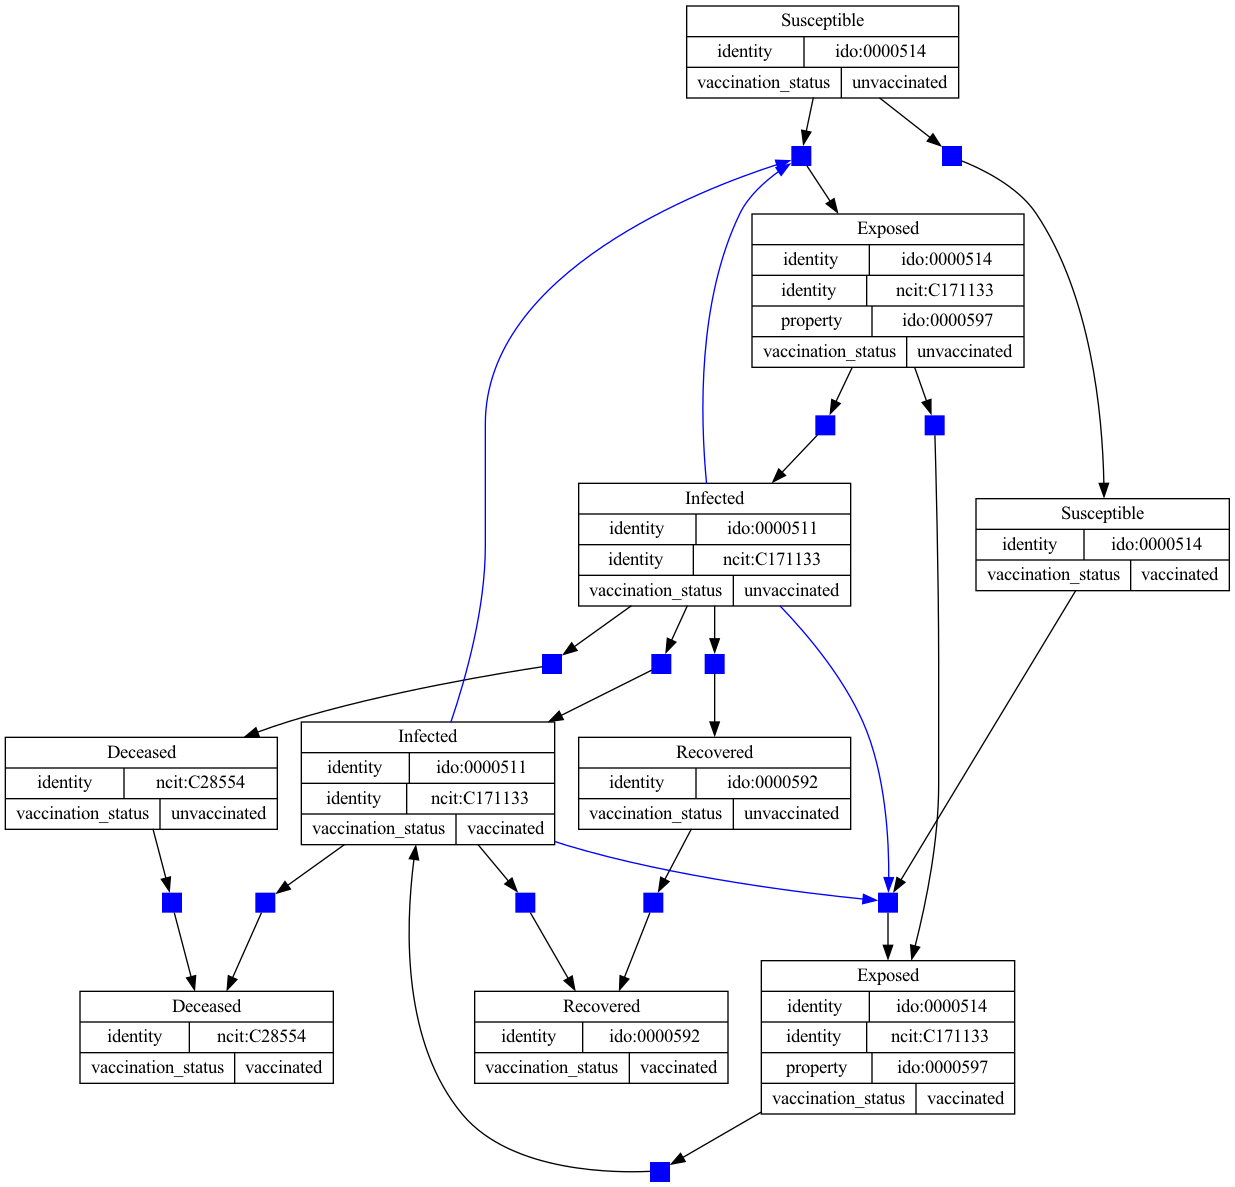

In [4]:
from mira.metamodel.ops import stratify

model_2 = stratify(
    model_1, 
    key="vaccination_status", 
    strata={"vaccinated", "unvaccinated"},
    structure=[("unvaccinated", "vaccinated")],
    directed=True,
    cartesian_control=True,
    # TODO add exclusion
    # exclude=[dead],
)

GraphicalModel.for_jupyter(model_2, width="50%")

This is the model mentioned in Scenario 1 task 3 for model comparison, subheading A-i

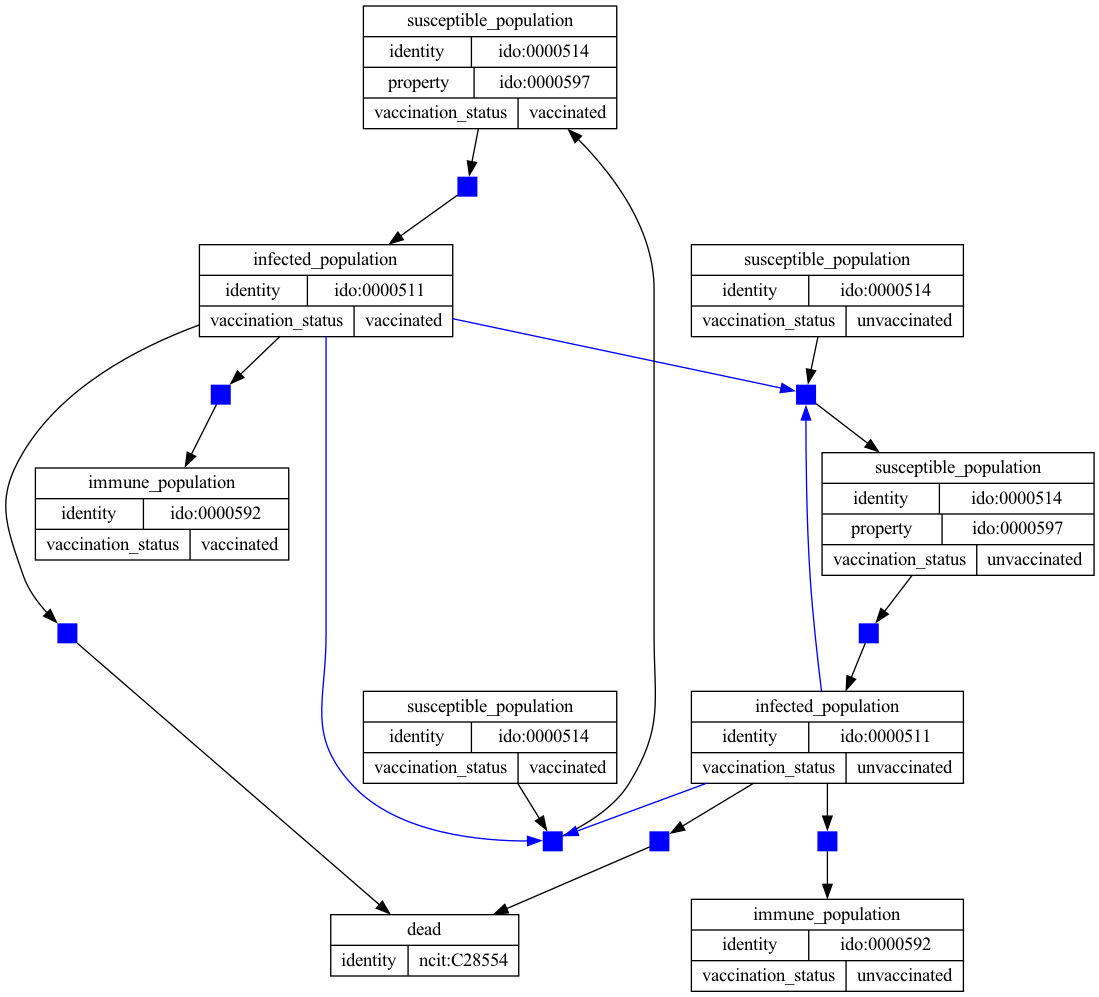

In [5]:
from mira.examples.jin2022 import seird_stratified

to_desktop(seird_stratified, "jin2022_seird_stratified.mmt.json")

GraphicalModel.for_jupyter(seird_stratified, width="80%")

The third model is the CHIME SVIIvR (which adds vaccination to the original CHIME model)

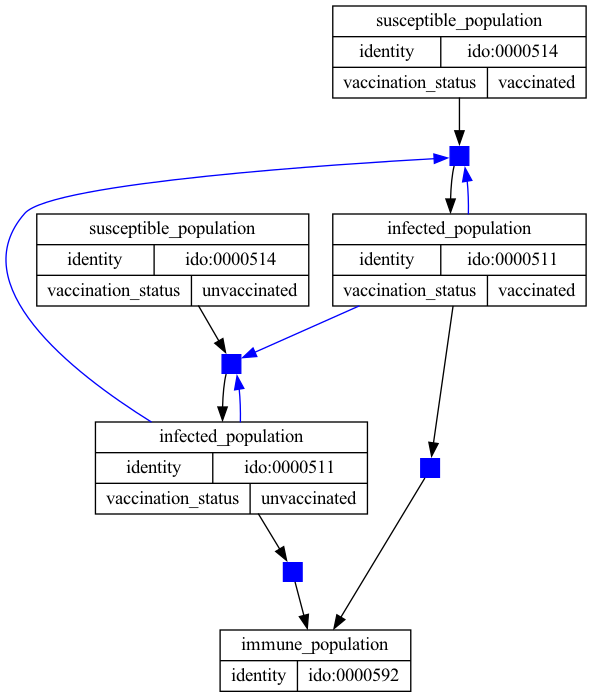

In [6]:
from mira.examples.chime import sviivr

to_desktop(sviivr, "chime_sviivr.mmt.json")

GraphicalModel.for_jupyter(sviivr, width="60%")

# Comparison

In [7]:
from mira.metamodel.templates import TemplateModelDelta
from IPython.display import Image
#from mira.metamodel.templates import get_dkg_refinement_closure
#refinement_fun = get_dkg_refinement_closure().is_ontological_child

from mira.dkg.web_client import is_ontological_child_web as refinement_fun

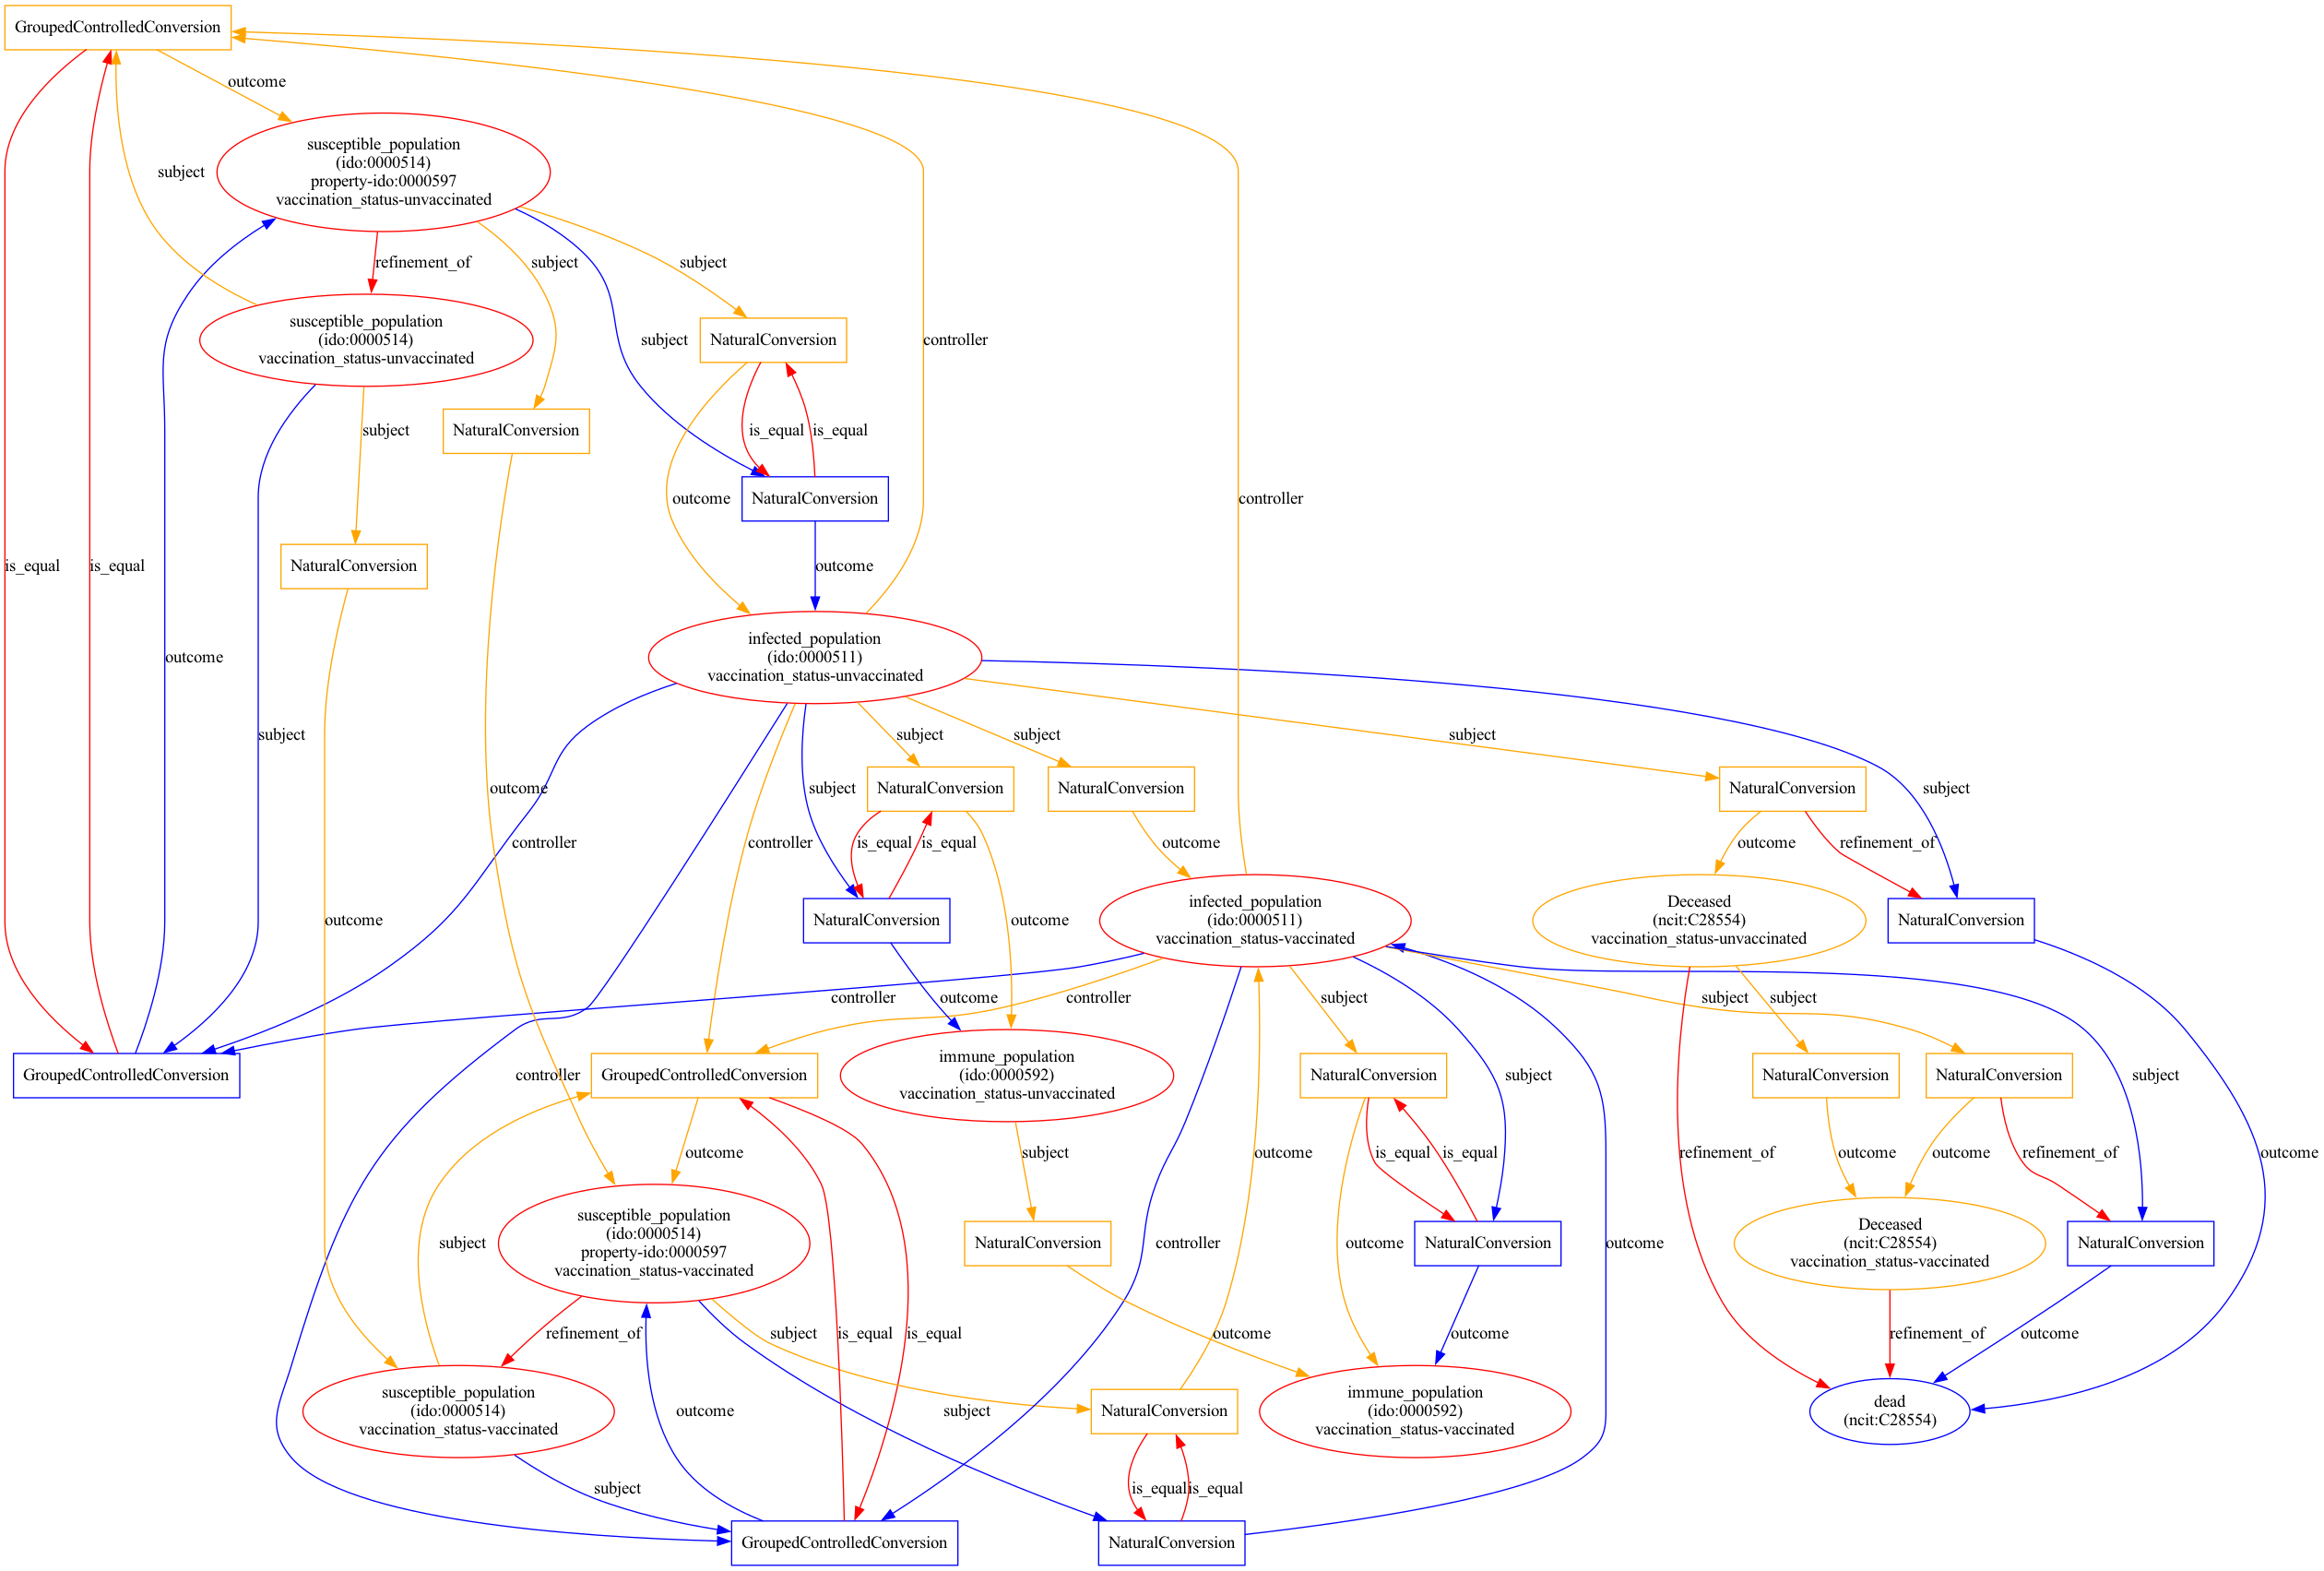

In [8]:
td = TemplateModelDelta(model_2, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

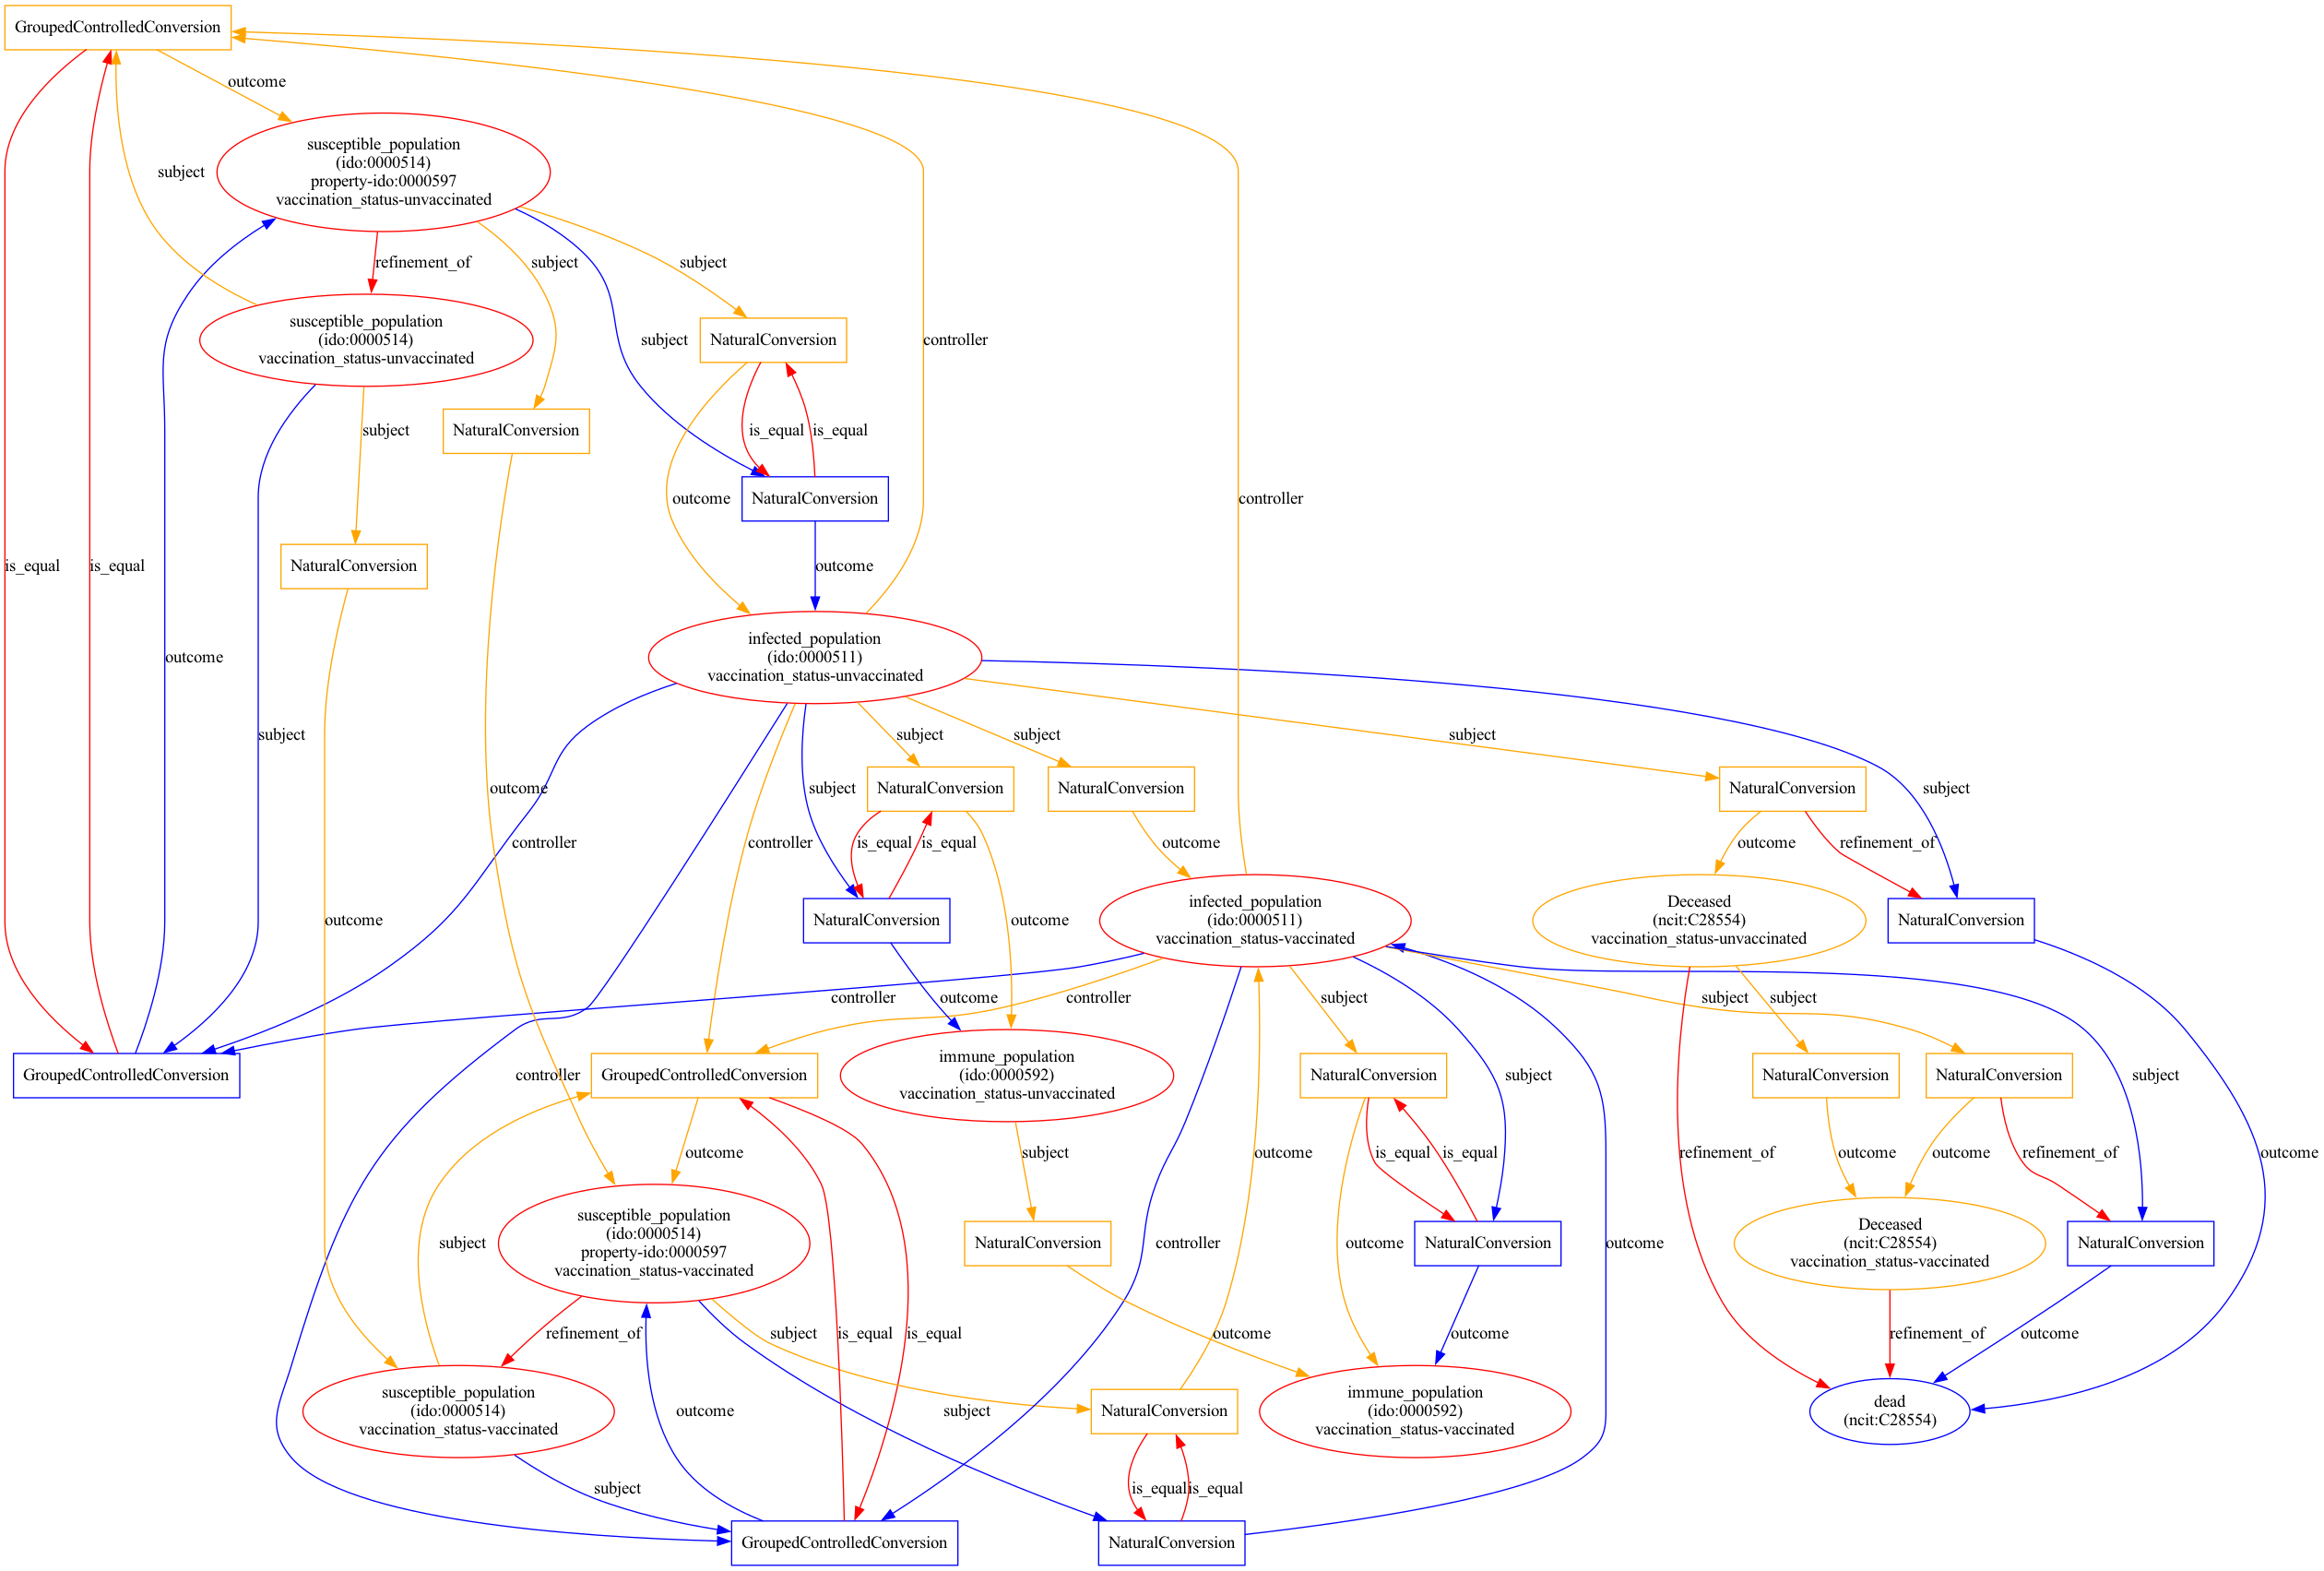

In [9]:
td = TemplateModelDelta(model_2, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

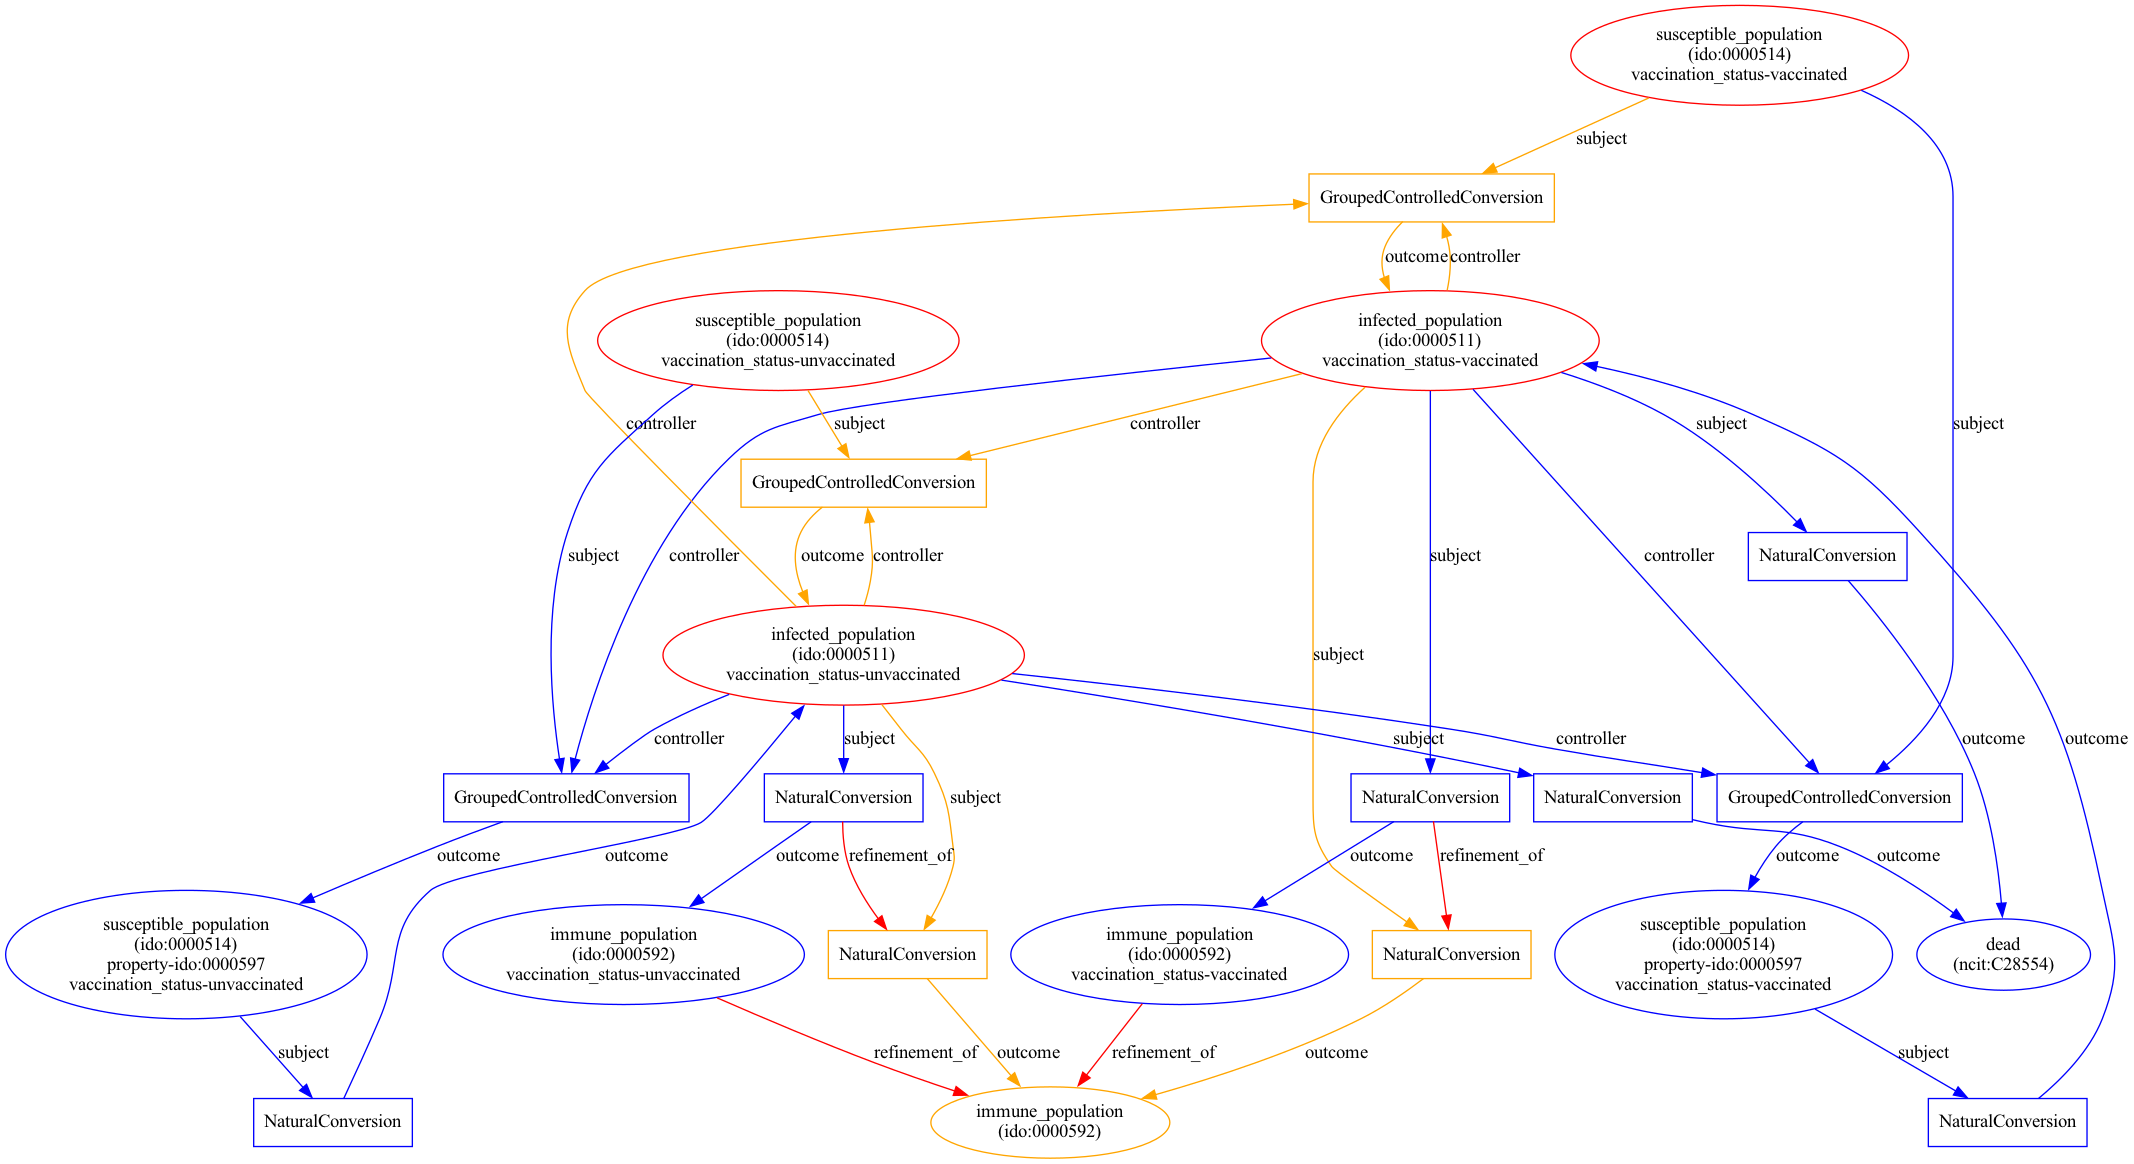

In [10]:
td = TemplateModelDelta(sviivr, seird_stratified, refinement_fun)
td.draw_graph('comparison3.png', args='-Grankdir=TB')
Image('comparison3.png')

### Model comparison for HMI integration

In [11]:
from mira.metamodel.templates import TemplateModelComparison

In [12]:
tc = TemplateModelComparison([model_2, sviivr, seird_stratified], refinement_fun)

In [13]:
print(tc.model_comparison.json(indent=1))

{
 "template_models": {
  "0": {
   "templates": [
    {
     "rate_law": null,
     "type": "GroupedControlledConversion",
     "controllers": [
      {
       "name": "Infected",
       "identifiers": {
        "ido": "0000511",
        "ncit": "C171133"
       },
       "context": {
        "vaccination_status": "unvaccinated"
       }
      },
      {
       "name": "Infected",
       "identifiers": {
        "ido": "0000511",
        "ncit": "C171133"
       },
       "context": {
        "vaccination_status": "vaccinated"
       }
      }
     ],
     "subject": {
      "name": "Susceptible",
      "identifiers": {
       "ido": "0000514"
      },
      "context": {
       "vaccination_status": "unvaccinated"
      }
     },
     "outcome": {
      "name": "Exposed",
      "identifiers": {
       "ncit": "C171133",
       "ido": "0000514"
      },
      "context": {
       "property": "ido:0000597",
       "vaccination_status": "unvaccinated"
      }
     },
     "provenance": []

In [14]:
with open('mira_comparison_threeway.json', 'w') as fh:
    fh.write(tc.model_comparison.json(indent=1))

In [16]:
tc.model_comparison.get_similarity_scores()

{(0, 1): 0.2, (0, 2): 0.3, (1, 2): 0.2222222222222222}